# Actividad

En esta actividad vas a tener que usar SVM para poder hacer clasificación. En este problema vamos a usar el _dataset_ **Red Wine Quality**. Lo vamos a importar a continuación.

In [ ]:
import pandas as pd

df = pd.read_csv('winequality-red-V2.csv',delimiter=";")
df = df.apply(pd.to_numeric)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.420,0.53,3.3,0.105,33.0,98.0,1.001,3.20,0.95,9.2,5
1,12.6,0.380,0.66,2.6,0.088,10.0,41.0,1.001,3.17,0.68,9.8,6
2,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.001,3.31,1.14,9.3,5
3,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.001,3.25,0.74,11.9,6
4,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.001,3.43,0.64,11.3,4


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,8.171270,0.528999,0.262736,2.455988,0.087124,15.843586,46.285340,0.996566,3.316957,0.656073,10.433213,5.634162
std,1.568645,0.180368,0.191257,1.184919,0.047638,10.345050,33.101253,0.001685,0.151907,0.170472,1.060821,0.808637
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995540,3.220000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.250000,2.200000,0.079000,14.000000,37.000000,0.996640,3.320000,0.620000,10.200000,6.000000
75%,9.000000,0.640000,0.410000,2.500000,0.090000,21.000000,62.000000,0.997618,3.400000,0.722500,11.100000,6.000000
max,15.900000,1.580000,1.000000,13.900000,0.611000,72.000000,289.000000,1.001000,4.010000,2.000000,14.900000,8.000000


Como vemos, son 1600 registros de distintas muestras de vino, cada una con ciertas propiedades. La última columna del _dataset_ es la calidad del vino, que vemos que está entre 3 y 8. Lo que se pide en esta actividad es que utilizando la implementación de SVM de Scikit Learn hagas un modelo que prediga la calidad del vino. Ojo que esta es una tarea de clasificación, es decir, no se espera que la calidad de un número decimal, sino que tiene que caer dentro de las notas presentes en el _dataset_. Para esta tarea tienes que considerar que la distribución de las calificaciones **no es uniforme**, por lo mismo, tienes que prestar atención a que tu modelo sepa manejar las clases "más raras". Lo que se te pide en esta actividad en concreto es:

1. Tienes que separar el _dataset_ en set de entrenamiento (70%) y prueba (30%). Para esto las muestras deben ser _stratified_, esto es, la proporción una calidad dada en ambos _dataset_ tiene que ser similar (ojo, la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de Scikit Learn hace esto por ti).
2. Tienes que escoger con qué _features_ vas a entrenar tu modelo. Puedes las _features_ que tú estimes conveniente, pero **tienes que justificar la elección de las features**.
3. Tienes que entrenar dos modelos SVM de Scikit Learn con los atributos que escogiste; un modelo debe usar el **kernel** `'poly'` mientras que el otro debe usar el **kernel** `'rbf'`. Tienes que justificar la elección de los hiperparámetros. Se espera que uses _Grid Search_ o algún método similar que averigües por tu cuenta.
4. Una vez entrenado ambos modelos, debes evaluarlos sobre el _dataset_ de prueba. Luego tienes que discutir los resultados. ¿Crees que se puede hacer algo mejor?

En esta actividad vamos a evaluar el resultado como un todo, es decir, no vamos a asignar puntos a partes en particular, sino que esperamos un trabajo lo más profesional posible, que justifique bien cada una de las decisiones tomadas. **Los trabajos que consideremos sobresalientes, los vamos a evaluar con nota 8**.

## Detalles Académicos

Esta actividad pueden realizarla en grupos de hasta dos personas. La entrega de esta actividad debe ser un archivo comprimido donde se encuentre un Jupyter Notebook, junto a cualquier archivo que estés llamando desde tu código. La fecha de entrega es hasta el viernes 6 de noviembre, hasta las 20:00 pm, cualquier entrega después de este plazo será calificada con la nota mínima. El archivo comprimido se entrega en un cuestionario de Webcursos.

# Inicio 

Primero que todo hicimos una limpieza de los outliers que presentaba el archivo desde el csv.
Esto incluye densidades de 100, miemntras que la mayoria estaba en un intervalo de 0 a 1. Tambien eliminamos algunos datos los cuales nos entregan 100.100.100, lo que genera multiples errores.

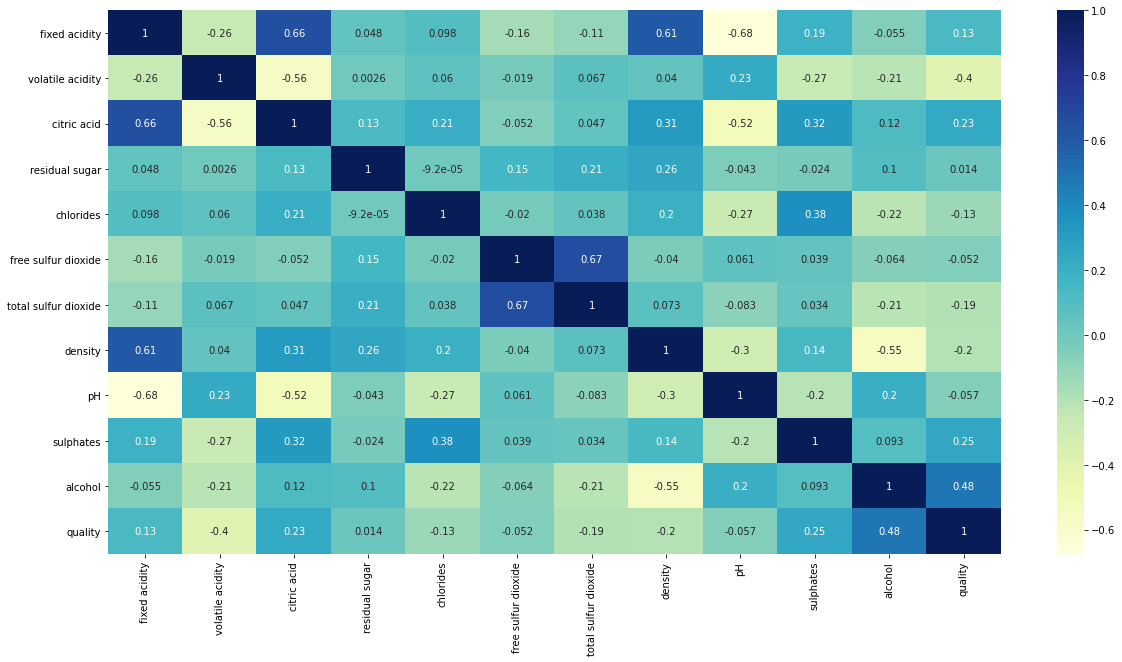

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sn

plt.figure(figsize=(20,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,cmap='YlGnBu')

Analizando los datos podemos notar multiples cosas. Primero, existe tres variables las cuales tienen las correlaciones más altas respecto a la calidad de los vinos. Además, más de 6 variables tiene correlaciones negativas, y las otras restantes no tiene una correlacion tan significativa. Por esto decidimos eliminar las features con menor correlacion y quedarnos con Citric acid, Sulphates, y Alcohol

# Kernel RBF

Para esta parte nos concentraremos en realizar el GridSearch para cada uno de los modelos, con sus Kernels especificos. Partiremos con el RBF y lo compararemos respecto a todo el dataset y nuestro dataset de tres features.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#definimos los datos de prueba inmediatamente
train_vino, test_vino = train_test_split(df,test_size=0.3)
#definimos los valores de los parametros
param_grid = {
    'svm_clf__C': [0.001, 10, 1000],
    'svm_clf__gamma': [0.1, 1, 5, 10],
}

#definimos a X como todas las variables menos quality
X= train_vino.drop('quality',1)
X_1=train_vino.drop(["quality","free sulfur dioxide","pH","residual sugar","fixed acidity","chlorides","total sulfur dioxide","density"], 1)
y= train_vino['quality']

#llamamos una instancia de SVM con rdf para ver cuales serian los hiperparametros

svm_instance = SVC(kernel='rbf', decision_function_shape='ovo')
validate_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', svm_instance),
    ])
#literalmente copiado de la clase
print("Prueba SVM con kernel RBF todos los features")
search = GridSearchCV(validate_svm_clf, param_grid, n_jobs=-1, cv=10)
search.fit(X, y)
print("")
print('Best parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)
print("")

#prueba con el X con las features definitivas
print("Prueba SVM con kernel RBF 3 features")
search = GridSearchCV(validate_svm_clf, param_grid, n_jobs=-1, cv=10)
search.fit(X_1, y)
print("")
print('Best parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)
print("")

Prueba SVM con kernel RBF todos los features


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)



Best parameter (CV score=0.670):
{'svm_clf__C': 1000, 'svm_clf__gamma': 1}

Prueba SVM con kernel RBF 3 features


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)



Best parameter (CV score=0.602):
{'svm_clf__C': 10, 'svm_clf__gamma': 0.1}



Los resultados varian drastricamente entre los dos, por lo que aún no podemos concluir nada. Ahora pasaremos a hacer lo mismo, pero con el kernel poly.

# Kernel Poly

Debido a multiples complicaciones con las wue nos enfrentamos , decidimos separar cada una de las pruebas para poder plasmar de mejor manera el resultado obtenido, siendo la primera la prueba con todo el Dataset y la segunda la prueba con el dataset escogido por nosotros

In [ ]:
prueba=train_vino.sample(200)
X= prueba.drop('quality',1)
X_1=prueba.drop(["quality","free sulfur dioxide","pH","residual sugar","fixed acidity","chlorides","total sulfur dioxide","density"], 1)
y= prueba['quality']

#llamamos una instancia de SVM con POLY para ver cuales serian los hiperparametros

svm_instance = SVC(kernel='poly', decision_function_shape='ovo')
validate_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', svm_instance),
    ])
#con poly pasaron horas y no consegui nada. Reduciré la cantidad de datos al 20%, y cambiaremos las iteraciones de cross validation a 3
search = GridSearchCV(validate_svm_clf, param_grid, n_jobs=-1, cv=4)
search.fit(X, y)
print("Prueba SVM con kernel pOLY todos los features")#esto es para que no aparezca texto innecesario
print('Best parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


Prueba SVM con kernel pOLY todos los features
Best parameter (CV score=0.520):
{'svm_clf__C': 10, 'svm_clf__gamma': 0.1}


In [ ]:
#prueba con el X con las features definitivas
from sklearn.preprocessing import StandardScaler as sc
sc = StandardScaler()
prueba= df.sample(100)
X = prueba.drop(["quality"],1)
X_2=prueba.drop(["quality","free sulfur dioxide","pH","residual sugar","fixed acidity","chlorides","total sulfur dioxide","density"], 1)
X_2 = sc.fit_transform(X_2)
y = prueba['quality']
x_train,x_test, y_train,y_test= train_test_split(X_2, y, test_size=0.3, random_state=42)

svm_instance = SVC(kernel='poly', decision_function_shape='ovo')
validate_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', svm_instance),
    ])

search = GridSearchCV(validate_svm_clf, param_grid, n_jobs=-1, cv=3) # No usaremos paralelísmo y haremos 5-fold cross-validation
search.fit(x_train, y_train) # Ojo, el fit es sobre el objeto GridSearch
print("Prueba SVM con kernel pOLY 3 features")#esto es para que no aparezca texto innecesario
print('Best parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)

Prueba SVM con kernel pOLY 3 features
Best parameter (CV score=0.557):
{'svm_clf__C': 10, 'svm_clf__gamma': 5}


Con los resultados obtenidos no podemos concluir mucho, pero podemos guiarnos por la moda, la cual es el 0,1 en Gamma y 10 en C. Con estois valores entrenamos nuestros modelos y luego hacemos las pruebas para ver como se comportan.

In [ ]:
SVMRBF = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=10, decision_function_shape='ovo')),
    ])
print("listo1")
SVMPOLY = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='poly', gamma=0.1, C=10, decision_function_shape='ovo')),
    ])
print("listo2")
SVMRBF.fit(X_1,y)
print("entrenado1")
SVMPOLY.fit(X_1,y)
print("entrenado2")

listo1
listo2
entrenado1
entrenado2


In [ ]:
from sklearn.metrics import accuracy_score
X_prueba=test_vino.drop(["quality","free sulfur dioxide","pH","residual sugar","fixed acidity","chlorides","total sulfur dioxide","density"], 1)
y_prueba=test_vino['quality']

pruebas_rbf = SVMRBF.predict(X_prueba)
pruebas_poly= SVMPOLY.predict(X_prueba)

print(accuracy_score(y_prueba,pruebas_rbf))
print("listo1")
print(accuracy_score(y_prueba,pruebas_poly))
print("listo2")

0.5272331154684096
listo1
0.47276688453159044
listo2


Viendo estos resultados podemos notar que los datos obtenidos muestran que con el kernel RBF obtuvimos un mayor porcentaje de acierto, aunque de todos modos ambos modelos no son lo que se puede decir precisos. Para mejorarlos creo que se podrian alterar las opciones en las que se maneja Gamma y C, de manera que obtendriamos los hiperparametros optimos.